In [23]:
import sys
import os
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

if (dir := str(Path(os.getcwd()).parent)) not in sys.path:
    sys.path.append(dir)

from mylib.metrics import Metrics, CMetrics

In [2]:
SEED = 73

np.random.seed = SEED

In [88]:
train_cat_dog, test_cat_dog = tf.keras.utils.image_dataset_from_directory(
    "../data/lab5_cat_dog",
    validation_split=0.15,
    subset="both",
    seed=SEED,
    image_size=(224,224),  # фотки разного размера
    batch_size=32,
)

Found 2000 files belonging to 2 classes.
Using 1700 files for training.
Using 300 files for validation.


In [89]:
train_caltech3, test_caltech3 = tf.keras.utils.image_dataset_from_directory(
    "../data/lab5_caltech3",
    validation_split=0.15,
    subset="both",
    seed=SEED,
    image_size=(224,224),
    batch_size=32,
)

Found 220 files belonging to 3 classes.
Using 187 files for training.
Using 33 files for validation.


## Кошки и собаки

In [32]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(5),
    ]
)

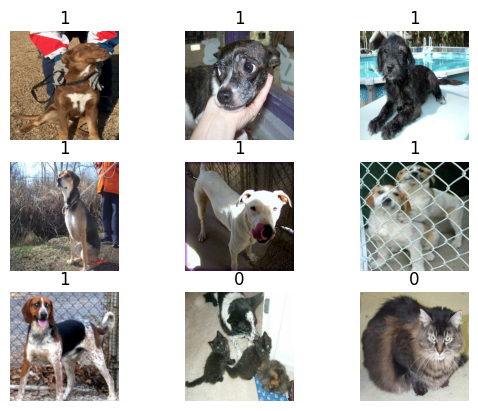

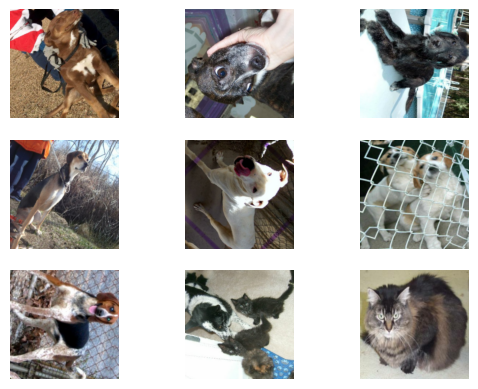

In [33]:
batch = train_cat_dog.take(1)

for images, _ in batch:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(_[i]))
        plt.axis("off")
    plt.show()
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.show()

In [34]:
train_cat_dog = train_cat_dog.map(lambda img, label: (data_augmentation(img), label))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [54]:
model_cat_dog = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, strides=2, padding="same"),
    tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
    tf.keras.layers.Conv2D(64, 4, strides=2, padding="same"),
    tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
    tf.keras.layers.Conv2D(64, 4, strides=1, padding="same"),
    tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax"),
])
model_cat_dog.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 112, 112, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 64)        32832     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 64)        65600     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 7, 7, 64)       

In [55]:
model_cat_dog.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [57]:
model_cat_dog.fit(train_cat_dog, epochs=10, validation_data=test_cat_dog)

Epoch 1/5
54/54 [==============================] - 10s 189ms/step - loss: 0.6244 - accuracy: 0.6500 - val_loss: 0.6128 - val_accuracy: 0.6533
Epoch 2/5
54/54 [==============================] - 10s 188ms/step - loss: 0.6537 - accuracy: 0.6471 - val_loss: 0.7541 - val_accuracy: 0.6667
Epoch 3/5
54/54 [==============================] - 10s 183ms/step - loss: 0.6450 - accuracy: 0.6471 - val_loss: 0.6404 - val_accuracy: 0.6933
Epoch 4/5
54/54 [==============================] - 11s 193ms/step - loss: 0.6260 - accuracy: 0.6529 - val_loss: 0.6147 - val_accuracy: 0.6800
Epoch 5/5
54/54 [==============================] - 10s 182ms/step - loss: 0.5964 - accuracy: 0.6853 - val_loss: 0.6458 - val_accuracy: 0.6967


### 3 класс, блин опять окружающий мир читать

In [90]:
train_caltech3 = train_caltech3.map(lambda img, label: (data_augmentation(img), label))

In [91]:
model_cl3 = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(64, 3, strides=2, padding="same"),
    tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
    tf.keras.layers.Conv2D(32, 3, strides=2, padding="same"),
    tf.keras.layers.MaxPooling2D(3, strides=2, padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax"),
])
model_cl3.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 6272)              0         
                                                                 
 dense_43 (Dense)            (None, 64)              

In [92]:
model_cl3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [93]:
model_cl3.fit(train_caltech3, epochs=10, validation_data=test_caltech3)

Epoch 1/10
6/6 [==============================] - 2s 248ms/step - loss: 67.0214 - accuracy: 0.3850 - val_loss: 22.1088 - val_accuracy: 0.6364
Epoch 2/10
6/6 [==============================] - 1s 221ms/step - loss: 33.2228 - accuracy: 0.5080 - val_loss: 8.5296 - val_accuracy: 0.5455
Epoch 3/10
6/6 [==============================] - 1s 217ms/step - loss: 9.1282 - accuracy: 0.5401 - val_loss: 3.8967 - val_accuracy: 0.6970
Epoch 4/10
6/6 [==============================] - 1s 202ms/step - loss: 6.5138 - accuracy: 0.5615 - val_loss: 2.1080 - val_accuracy: 0.7576
Epoch 5/10
6/6 [==============================] - 1s 207ms/step - loss: 3.2115 - accuracy: 0.6471 - val_loss: 2.2162 - val_accuracy: 0.7273
Epoch 6/10
6/6 [==============================] - 1s 207ms/step - loss: 1.9816 - accuracy: 0.6952 - val_loss: 1.4346 - val_accuracy: 0.7273
Epoch 7/10
6/6 [==============================] - 1s 212ms/step - loss: 1.7963 - accuracy: 0.7701 - val_loss: 1.1446 - val_accuracy: 0.8182
Epoch 8/10
6/6 [=

## InceptionV3

In [138]:
inc_v3 = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=((224, 224, 3)))
inc_v3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_38 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_426 (Conv2D)            (None, 111, 111, 32  864         ['input_38[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_376 (Batch  (None, 111, 111, 32  96         ['conv2d_426[0][0]']             
 Normalization)                 )                                                      

In [139]:
layer_in = inc_v3.input
layer_out = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax'),
])(inc_v3.layers[-2].output)
model_inc_v3 = tf.keras.Model(layer_in, layer_out)

for layer in model_inc_v3.layers:
    layer.trainable = False

# model_inc_v3.layers[-1].trainable = True
model_inc_v3.layers[-1].trainable = True

model_inc_v3.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_38 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_426 (Conv2D)            (None, 111, 111, 32  864         ['input_38[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_376 (Batch  (None, 111, 111, 32  96         ['conv2d_426[0][0]']             
 Normalization)                 )                                                           

In [140]:
model_inc_v3.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [141]:
model_inc_v3.fit(train_caltech3, epochs=10, validation_data=test_caltech3)

Epoch 1/10
6/6 [==============================] - 10s 1s/step - loss: 47.8334 - accuracy: 0.4118 - val_loss: 46.5751 - val_accuracy: 0.5758
Epoch 2/10
6/6 [==============================] - 5s 880ms/step - loss: 23.6338 - accuracy: 0.6257 - val_loss: 15.1308 - val_accuracy: 0.6061
Epoch 3/10
6/6 [==============================] - 5s 911ms/step - loss: 14.7450 - accuracy: 0.6364 - val_loss: 19.9126 - val_accuracy: 0.6667
Epoch 4/10
6/6 [==============================] - 6s 941ms/step - loss: 14.1487 - accuracy: 0.6631 - val_loss: 9.7311 - val_accuracy: 0.6667
Epoch 5/10
6/6 [==============================] - 6s 967ms/step - loss: 8.3892 - accuracy: 0.7273 - val_loss: 10.1107 - val_accuracy: 0.6364
Epoch 6/10
6/6 [==============================] - 6s 942ms/step - loss: 7.6496 - accuracy: 0.7754 - val_loss: 15.1392 - val_accuracy: 0.6970
Epoch 7/10
6/6 [==============================] - 5s 858ms/step - loss: 8.6123 - accuracy: 0.7647 - val_loss: 12.0898 - val_accuracy: 0.6364
Epoch 8/10
6

## VGG19

In [126]:
vgg19 = tf.keras.applications.VGG19(weights='imagenet', include_top=True)
vgg19.summary()

574710816/574710816 [==============================] - 70s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [131]:
layer_in_vgg19 = vgg19.input
layer_out_vgg19 = tf.keras.layers.Dense(3, activation='softmax')(vgg19.layers[-2].output)
model_vgg19 = tf.keras.Model(layer_in_vgg19, layer_out_vgg19)

for layer in model_vgg19.layers:
    layer.trainable = False

model_vgg19.layers[-1].trainable = True

model_vgg19.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [132]:
model_vgg19.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [133]:
model_vgg19.fit(train_caltech3, epochs=10, validation_data=test_caltech3)

Epoch 1/10
6/6 [==============================] - 29s 5s/step - loss: 0.6059 - accuracy: 0.7433 - val_loss: 0.0638 - val_accuracy: 0.9697
Epoch 2/10
6/6 [==============================] - 26s 4s/step - loss: 0.1298 - accuracy: 0.9626 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 26s 4s/step - loss: 0.0411 - accuracy: 0.9840 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 26s 4s/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 26s 4s/step - loss: 0.0188 - accuracy: 0.9893 - val_loss: 0.0281 - val_accuracy: 0.9697
Epoch 6/10
6/6 [==============================] - 25s 4s/step - loss: 0.0550 - accuracy: 0.9893 - val_loss: 0.0262 - val_accuracy: 0.9697
Epoch 7/10
6/6 [==============================] - 25s 4s/step - loss: 0.0091 - accuracy: 0.9947 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 8/10
6/6 [==================

In [136]:
model_vgg19_2 = tf.keras.Model(layer_in_vgg19, layer_out_vgg19)

for layer in model_vgg19_2.layers:
    layer.trainable = False

model_vgg19_2.layers[-2].trainable = True
model_vgg19_2.layers[-1].trainable = True

model_vgg19_2.summary()

model_vgg19_2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [137]:
model_vgg19_2.fit(train_caltech3, epochs=5, validation_data=test_caltech3)

Epoch 1/5
6/6 [==============================] - 29s 5s/step - loss: 5.0127 - accuracy: 0.8396 - val_loss: 0.8983 - val_accuracy: 0.9091
Epoch 2/5
6/6 [==============================] - 30s 5s/step - loss: 1.1749 - accuracy: 0.9519 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
6/6 [==============================] - 28s 5s/step - loss: 0.0209 - accuracy: 0.9947 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
6/6 [==============================] - 29s 5s/step - loss: 0.3179 - accuracy: 0.9840 - val_loss: 1.8117e-04 - val_accuracy: 1.0000
Epoch 5/5
6/6 [==============================] - 29s 5s/step - loss: 0.2179 - accuracy: 0.9947 - val_loss: 3.6124e-09 - val_accuracy: 1.0000
